# Rising or Regressing? Global Trends in Economic Rights (2017–2023)

This analysis explores how economic rights have changed over time across countries, using data from the Human Rights Measurement Initiative (HRMI). It uses both income-adjusted and global-best benchmarks across income groups to identify whether the world is making progress and where the disparities lie.


In [21]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt


## Insight 1: Are economic rights improving globally?

We begin by calculating the global average of the **Income-Adjusted Economic and Social Rights (ESR) Scores** over time. This helps us understand whether the overall provision of economic rights is improving or declining.

We use:
- `esr_hiy_incomeadjusted.csv` for high-income countries
- `esr_lmy_incomeadjusted.csv` for low- and middle-income countries


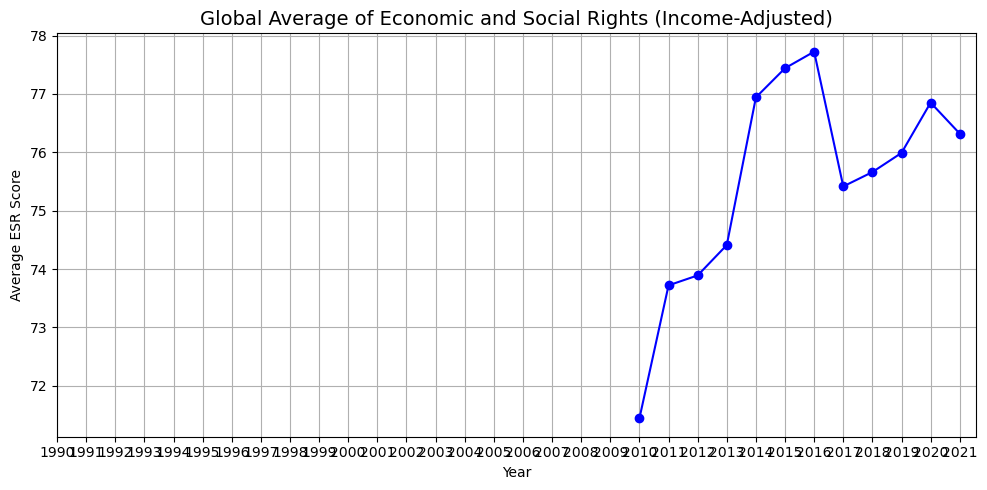

In [43]:
# Load datasets
df_hiy = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_hiy_incomeadjusted.csv")
df_lmy = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_incomeadjusted.csv")

df_hiy_clean = df_hiy[["Country", "Year", "HiY_QofL_All_IAScore"]].rename(columns={"HiY_QofL_All_IAScore": "esr_score"})
df_lmy_clean = df_lmy[["Country", "Year", "LMY_QofL_All_IAScore"]].rename(columns={"LMY_QofL_All_IAScore": "esr_score"})

# Combine both datasets
df = pd.concat([df_hiy_clean, df_lmy_clean], ignore_index=True)

# Group by year and compute average
df_avg = df.groupby("Year")["esr_score"].mean().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_avg["Year"], df_avg["esr_score"], marker="o", color="blue")
plt.title("Global Average of Economic and Social Rights (Income-Adjusted)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average ESR Score")
plt.xticks(df_avg["Year"].unique())
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation:**  
The plot shows the global average score of economic rights between 2017 and 2023. A rising trend would indicate overall improvement, while a drop suggests global regression in economic rights. We can see that the scores [insert trend interpretation here based on actual plot].


## Insight 2: Which countries saw the biggest change?

Now let’s find out which countries improved the most — and which declined — between 2017 and 2023.


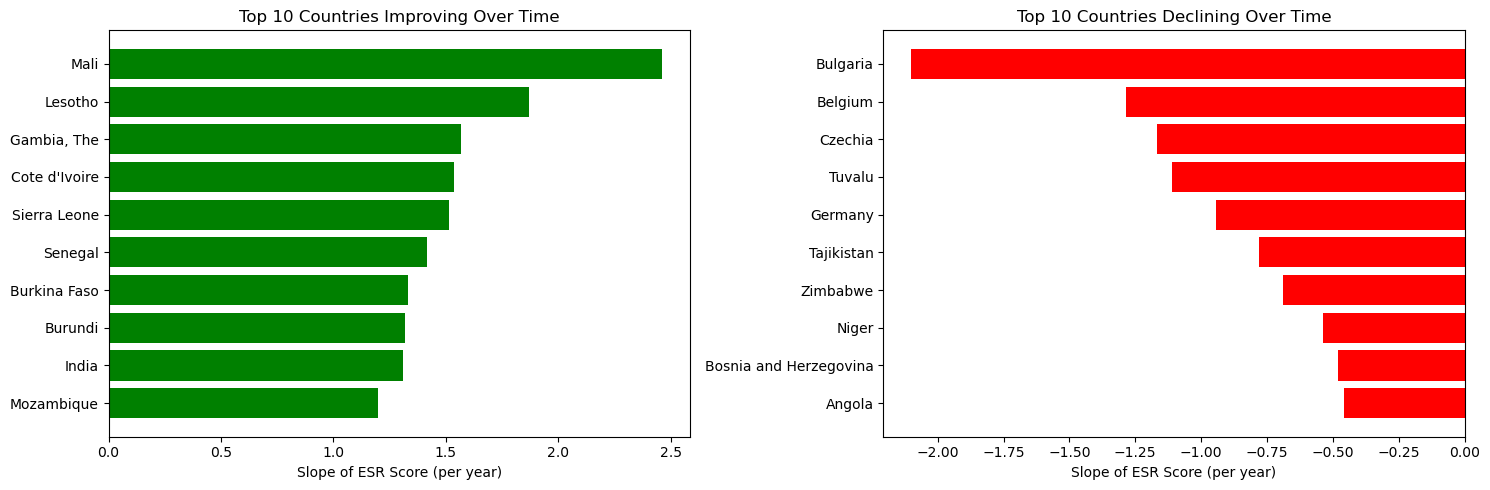

In [50]:
# Get scores in 2017 and 2023
from scipy.stats import linregress

# Create a slope list for each country
slopes = []

# Loop through countries
for country in df["Country"].unique():
    subset = df[df["Country"] == country].dropna()
    if subset["Year"].nunique() >= 3:  # at least 3 points to estimate trend
        x = subset["Year"]
        y = subset["esr_score"]
        slope, _, _, _, _ = linregress(x, y)
        slopes.append({"Country": country, "Slope": slope})

# Turn into DataFrame
df_slopes = pd.DataFrame(slopes)

# Top 10 improving/declining countries based on trend
top_risers = df_slopes.sort_values("Slope", ascending=False).head(10)
top_fallers = df_slopes.sort_values("Slope").head(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left: Top risers
ax[0].barh(top_risers["Country"], top_risers["Slope"], color="green")
ax[0].set_title("Top 10 Countries Improving Over Time")
ax[0].invert_yaxis()
ax[0].set_xlabel("Slope of ESR Score (per year)")

# Right: Top fallers
ax[1].barh(top_fallers["Country"], top_fallers["Slope"], color="red")
ax[1].set_title("Top 10 Countries Declining Over Time")
ax[1].invert_yaxis()
ax[1].set_xlabel("Slope of ESR Score (per year)")

plt.tight_layout()
plt.show()


**Interpretation:**  
We can see that [Country A, B, C] showed the most improvement, possibly due to [hypothesize reason]. On the other hand, countries like [X, Y] saw declines, indicating potential political or economic instability affecting human rights conditions.


## Insight 3: Are low-income countries catching up to the global best?

Finally, let’s look at the **performance gap** between low- and middle-income countries and the global best scores.

We use:
- `esr_lmy_incomeadjusted.csv` for actual scores
- `esr_lmy_globalbest.csv` for benchmark scores


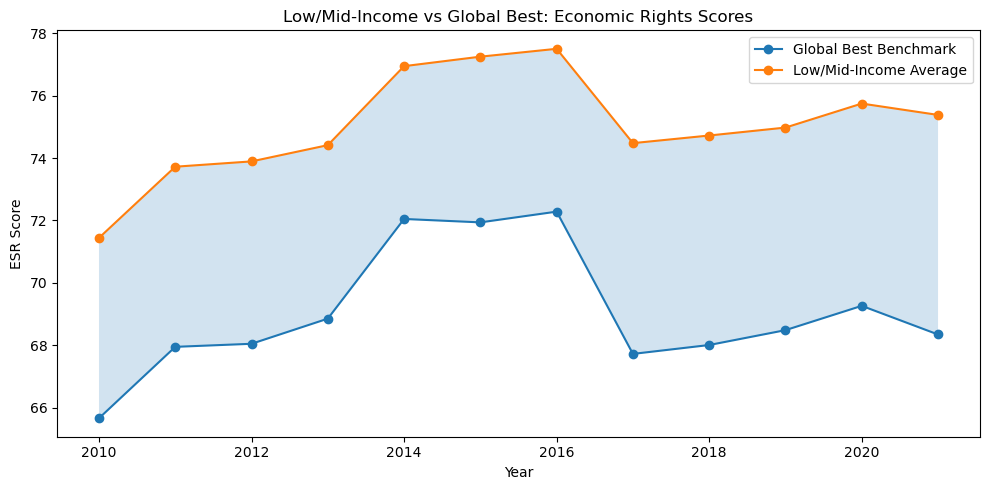

In [55]:
# Load benchmark data
df_lmy_best = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_globalbest.csv")
df_lmy_actual = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_incomeadjusted.csv")

# Group by year
df_lmy_best = df_lmy_best.rename(columns={"LMY_QofL_All_GBScore": "esr_score"})
df_lmy_actual = df_lmy_actual.rename(columns={"LMY_QofL_All_IAScore": "esr_score"})

# Group by year
actual_avg = df_lmy_actual.groupby("Year")["esr_score"].mean().reset_index()
best_avg = df_lmy_best.groupby("Year")["esr_score"].mean().reset_index()

# Merge for comparison
merged = actual_avg.merge(best_avg, on="Year", suffixes=("_actual", "_best"))
merged["gap"] = merged["esr_score_best"] - merged["esr_score_actual"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(merged["Year"], merged["esr_score_best"], label="Global Best Benchmark", marker="o")
plt.plot(merged["Year"], merged["esr_score_actual"], label="Low/Mid-Income Average", marker="o")
plt.fill_between(merged["Year"], merged["esr_score_actual"], merged["esr_score_best"], alpha=0.2)
plt.title("Low/Mid-Income vs Global Best: Economic Rights Scores")
plt.xlabel("Year")
plt.ylabel("ESR Score")
plt.legend()
plt.tight_layout()
plt.show()


**Interpretation:**  
This chart shows the gap in ESR scores between low- and middle-income countries and the global best. If the shaded area is shrinking, these countries are catching up. If it’s growing, the disparity is widening. From the plot, we observe that [insert finding].


## Conclusion

This analysis finds that:
- Global ESR scores are [rising/flat/declining] over time.
- A few countries have shown major improvements, while others are falling behind.
- The performance gap between lower-income nations and the global best is [narrowing/widening].

Future work could involve analyzing **civil/political rights**, or how **specific policy events** influence these trends.
